In [1]:
import os
#import mne
import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
import numpy as np
from scipy import signal
%matplotlib inline
plt.rcParams['axes.grid'] = False

In [2]:
base_eeg = np.loadtxt('/Users/oak/Downloads/Data_Set/Baseline/ID#1.txt', delimiter=' ')

In [3]:
epi_eeg = np.loadtxt('/Users/oak/Downloads/Data_Set/Epileptogenesis/ID#1.txt', delimiter=' ')

In [4]:
# Print the shape of the data array to verify
print("Shape of data array:", base_eeg.shape)
print("Shape of data array:", epi_eeg.shape)

Shape of data array: (263577600,)
Shape of data array: (315408384,)


In [5]:
# Print the first few rows to verify
bsamp_eeg=base_eeg[:1000]
print("First few rows of Baseline:")
print(bsamp_eeg)

First few rows of Baseline:
[43127. 43155. 43259. 43247. 43247. 43195. 43244. 43242. 43260. 43289.
 43289. 43215. 43231. 43279. 43243. 43231. 43252. 43269. 43253. 43253.
 43270. 43255. 43262. 43262. 43211. 43258. 43286. 43295. 43295. 43150.
 43127. 43127. 43165. 43199. 43277. 43279. 43271. 43295. 43269. 43218.
 43183. 43229. 43229. 43275. 43275. 43283. 43259. 43259. 43303. 43238.
 43238. 43238. 43228. 43275. 43275. 43301. 43263. 43263. 43239. 43239.
 43239. 43239. 43241. 43277. 43259. 43247. 43237. 43263. 43219. 43194.
 43194. 43251. 43251. 43320. 43320. 43320. 43279. 43263. 43243. 43211.
 43314. 43314. 43314. 43283. 43304. 43365. 43365. 43309. 43341. 43311.
 43311. 43267. 43267. 43354. 43354. 43326. 43343. 43335. 43311. 43303.
 43295. 43304. 43304. 43304. 43283. 43279. 43244. 43244. 43183. 43220.
 43220. 43159. 43159. 43159. 43167. 43167. 43167. 43139. 43123. 43123.
 43143. 43143. 43143. 43143. 43132. 43025. 42991. 43065. 43083. 43083.
 43182. 43182. 43182. 43222. 43158. 43199. 43207.

In [6]:
esamp_eeg=epi_eeg[:1000]
print("First few rows of Epileptogenesis:")
print(esamp_eeg)

First few rows of Epileptogenesis:
[43861. 43902. 43851. 43791. 43775. 43763. 43751. 43679. 43683. 43619.
 43645. 43669. 43655. 43643. 43659. 43655. 43705. 43695. 43679. 43731.
 43622. 43645. 43639. 43557. 43591. 43605. 43599. 43607. 43703. 43647.
 43631. 43631. 43659. 43647. 43641. 43663. 43647. 43655. 43653. 43711.
 43699. 43663. 43735. 43763. 43739. 43747. 43687. 43685. 43635. 43579.
 43581. 43559. 43583. 43659. 43596. 43620. 43613. 43615. 43575. 43583.
 43541. 43515. 43519. 43501. 43557. 43571. 43575. 43631. 43670. 43631.
 43620. 43567. 43580. 43655. 43657. 43711. 43661. 43647. 43661. 43657.
 43679. 43711. 43659. 43627. 43631. 43631. 43639. 43641. 43598. 43589.
 43659. 43663. 43631. 43694. 43731. 43683. 43579. 43566. 43569. 43621.
 43611. 43598. 43591. 43599. 43647. 43594. 43655. 43759. 43771. 43757.
 43699. 43686. 43687. 43709. 43631. 43605. 43647. 43639. 43643. 43639.
 43666. 43683. 43668. 43673. 43689. 43677. 43671. 43655. 43674. 43719.
 43675. 43654. 43597. 43587. 43567. 43607.

In [7]:
#Define some parameters
sampling_rate = 512.0  # Sampling rate of EEG data (Hz)
epoch_duration_seconds = 20  # Duration of each epoch in seconds
overlap_seconds = 10  # Overlap between consecutive epochs in seconds

# Calculate the number of samples for epoch_duration
epoch_duration = int(epoch_duration_seconds * sampling_rate)

# Calculate the number of samples for overlap
overlap = int(overlap_seconds * sampling_rate)

In [8]:
# Check for missing values
base_missing_values = np.isnan(base_eeg).any()  # Check if any NaN value exists
epi_missing_values = np.isnan(base_eeg).any()  # Check if any NaN value exists
print("Missing values in Baseline:", base_missing_values)
print("Missing values in Epileptogenesis:", epi_missing_values)

Missing values in Baseline: False
Missing values in Epileptogenesis: False


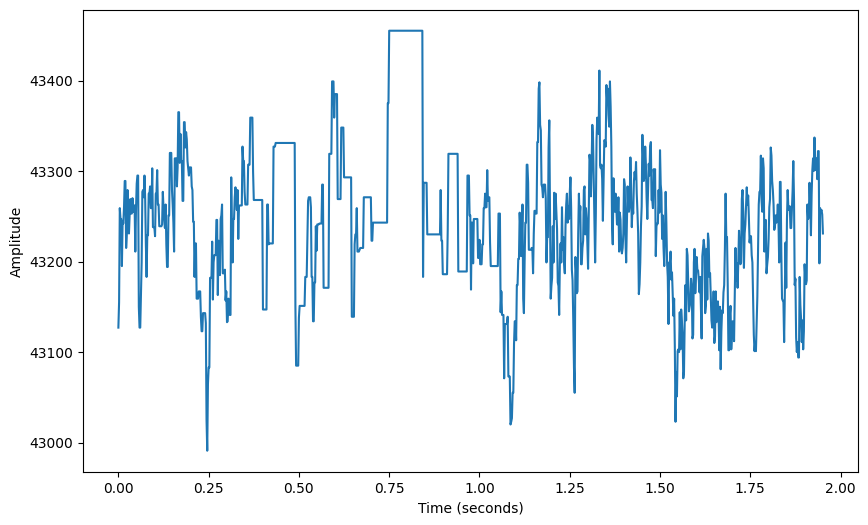

In [9]:
# Define the time axis (assuming sampling rate of 512 Hz)
timeb = np.arange(len(bsamp_eeg)) / sampling_rate  # Time in seconds

# Plot the raw EEG signal over time
plt.figure(figsize=(10, 6))
plt.plot(timeb, bsamp_eeg)
#plt.title('Raw EEG Signal over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

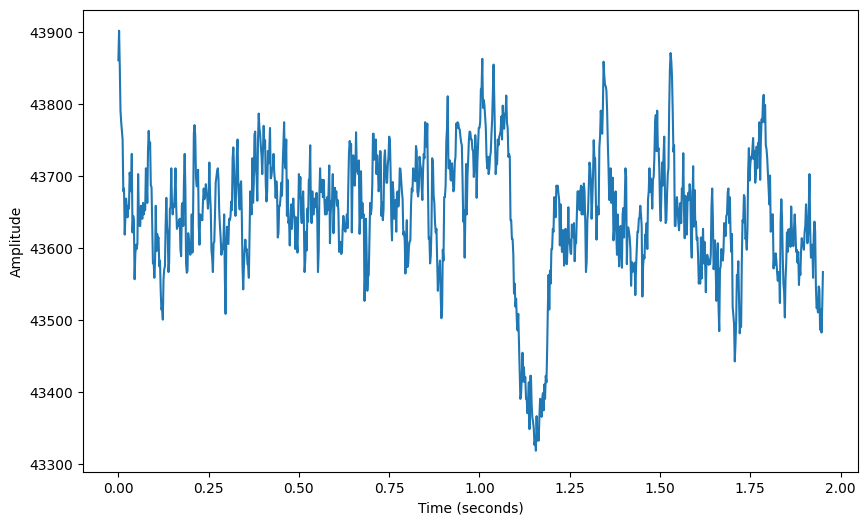

In [10]:
# Define the time axis (assuming sampling rate of 512 Hz)
timee = np.arange(len(esamp_eeg)) / sampling_rate  # Time in seconds

# Plot the raw EEG signal over time
plt.figure(figsize=(10, 6))
plt.plot(timee, esamp_eeg)
#plt.title('Raw EEG Signal over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In [11]:
import pywt

# Decompose EEG data using wavelet transform
coeffs1 = pywt.wavedec(base_eeg, wavelet='db4', level=5)
coeffs2 = pywt.wavedec(epi_eeg, wavelet='db4', level=5)

# Filter out noise by thresholding or modifying coefficients

# Reconstruct filtered EEG data
filtered_data1 = pywt.waverec(coeffs1, wavelet='db4')
filtered_data2 = pywt.waverec(coeffs2, wavelet='db4')

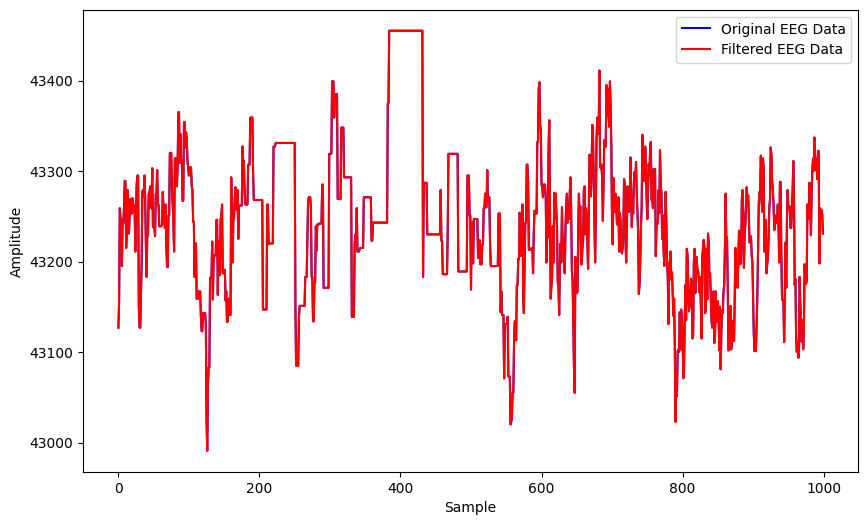

In [12]:
# Plot original and filtered EEG data
samp_filtered1 = filtered_data1[:1000]
# Plot original and filtered data
plt.figure(figsize=(10, 6))
plt.plot(bsamp_eeg, label='Original EEG Data', color='blue')
plt.plot(samp_filtered1, label='Filtered EEG Data', color='red')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

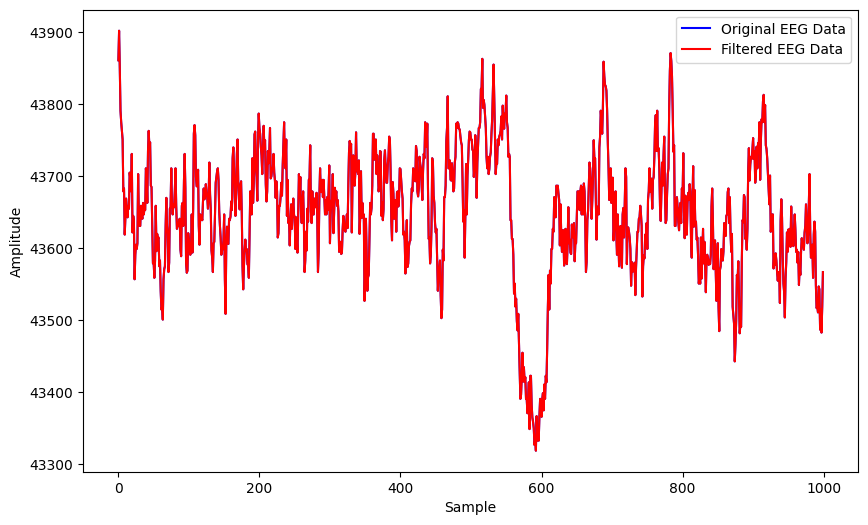

In [13]:
# Plot original and filtered EEG data
samp_filtered2 = filtered_data2[:1000]
plt.figure(figsize=(10, 6))
plt.plot(esamp_eeg, label='Original EEG Data', color='blue')
plt.plot(samp_filtered2, label='Filtered EEG Data', color='red')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [14]:
min(base_eeg)

0.0

In [15]:
max(base_eeg)

48667.0

In [17]:
def plot_spect(sample,sampling_rate,nperseg,nyquist_freq):
    # Compute the spectrogram using scipy.signal.spectrogram
    f, t, Sxx = signal.spectrogram(sample,fs=sampling_rate, nperseg=nperseg, noverlap=nperseg-1,window=signal.get_window('hann',nperseg))

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, Sxx, cmap='nipy_spectral_r')  # Convert to dB scale
    #plt.title('Spectrogram of EEG Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    #plt.colorbar(label='Power/Frequency (dB/Hz)')

    # Plot Nyquist frequency
    plt.axhline(y=nyquist_freq, color='r', linestyle='--', label='Nyquist Frequency')
    plt.legend(loc="upper right")

    plt.show()


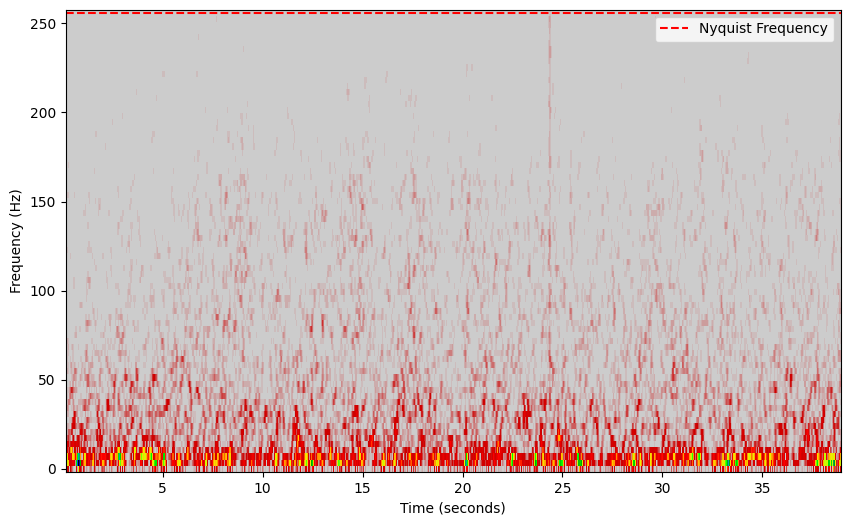

In [18]:
# Define spectrogram parameters
nperseg = 150
# Calculate Nyquist frequency
nyquist_freq = sampling_rate / 2
plot_spect(base_eeg[:20000],sampling_rate,nperseg,nyquist_freq)

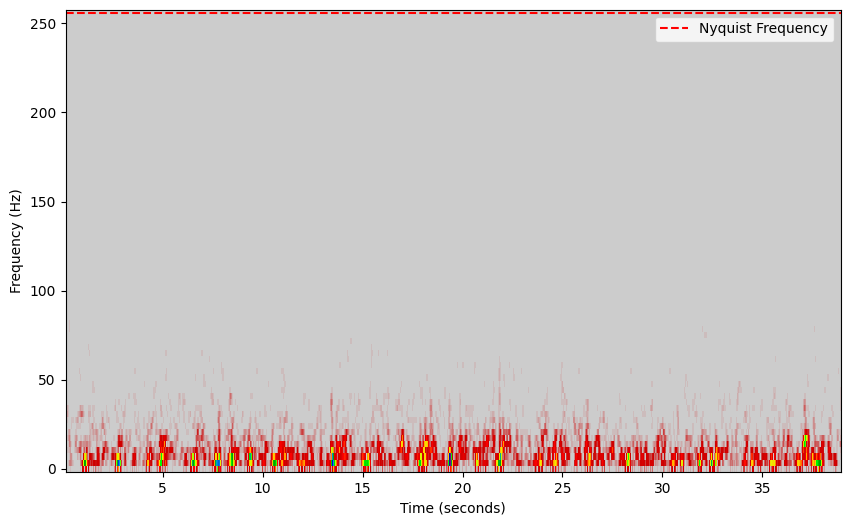

In [19]:
plot_spect(epi_eeg[:20000],sampling_rate,nperseg,nyquist_freq)